### Business problem statement

#### Traffic sign recognition is a multi-class classification problem with unbalanced class frequencies. Traffic signs can provide a wide range of variations between classes in terms of color, shape, and the presence of pictograms or text. However, there exist subsets of classes (e. g., speed limit signs) that are very similar to each other.

#### Here we have to determine the boundary box where the traffic signal is and we have to classify which class the signal belongs to
#### Identifying boundary box is a Regression model and Classifying the traffic signal is a Classification Model.

### Metrics
##### F1 score (for Classification)
##### MSE (for Regression)

Dataset: http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset

In [1]:
import pandas as pd
from PIL import Image

In [2]:
df= pd.read_csv(r"C:\Users\Abhishek\Desktop\GTSRB-Training_fixed\GTSRB\Training\00000\GT-00000.csv",sep=';')

In [3]:
df.head()

,Filename,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
0,00000_00000.ppm,29,30,5,6,24,25,0
1,00000_00001.ppm,30,30,5,5,25,25,0
2,00000_00002.ppm,30,30,5,5,25,25,0
3,00000_00003.ppm,31,31,5,5,26,26,0
4,00000_00004.ppm,30,32,5,6,25,26,0


### Taking all the files in a list as to read from path

In [4]:
import os
path='C:/Users/Abhishek/Desktop/GTSRB-Training_fixed/GTSRB/Training/'
pa=os.listdir(path)

In [5]:
# for i in pa:
#     print(i)

In [6]:
pa=pa[:-1]

In [8]:
# pa

### Converting from ppm to jpg from each folders in Training Dataset

In [135]:
for j in pa:
    df= pd.read_csv(r"C:/Users/Abhishek/Desktop/GTSRB-Training_fixed/GTSRB/Training/"+j+"/"+"GT-"+j+".csv",sep=';')
    os.mkdir('Train/'+j+"/")
    for i in range(df.shape[0]):
        p=r"C:/Users/Abhishek/Desktop/GTSRB-Training_fixed/GTSRB/Training/"+j+"/"+df['Filename'].iloc[i]
        im = Image.open(p)
#         im = im.crop(tuple(df[['Roi.X1','Roi.Y1','Roi.X2','Roi.Y2']].iloc[i]))
        f=df['Filename'].iloc[i].split('.')[0]+".jpg"
        im.save('Train/'+j+"/"+f)

### Observing width and height

In [6]:
w=[]
h=[]
for j in pa:
    df= pd.read_csv(r"C:/Users/Abhishek/Desktop/GTSRB-Training_fixed/GTSRB/Training/"+j+"/"+"GT-"+j+".csv",sep=';')
    for i in range(df.shape[0]):
        p=r"C:/Users/Abhishek/Desktop/GTSRB-Training_fixed/GTSRB/Training/"+j+"/"+df['Filename'].iloc[i]
        im = Image.open(p)
        width, height = im.size
        w.append(width)
        h.append(height)

In [7]:
import numpy as np
# w.sort(reverse=True)
w = np.array(w)
print("50th percentile",np.percentile(w, 50))
print("70th percentile",np.percentile(w, 70))
print("80th percentile",np.percentile(w, 80))
print("90th percentile",np.percentile(w, 90))
print("92th percentile",np.percentile(w, 92))
print("95th percentile",np.percentile(w, 95))
print("97th percentile",np.percentile(w, 97))

50th percentile 43.0
70th percentile 54.0
80th percentile 63.0
90th percentile 82.0
92th percentile 87.88000000000102
95th percentile 101.04999999999927
97th percentile 117.0


In [8]:
sum(w)/len(w)

50.93378378378378

In [9]:
import numpy as np
# h.sort(reverse=True)
h = np.array(h)
print("50th percentile",np.percentile(h, 50))
print("70th percentile",np.percentile(h, 70))
print("80th percentile",np.percentile(h, 80))
print("90th percentile",np.percentile(h, 90))
print("92th percentile",np.percentile(h, 92))
print("95th percentile",np.percentile(h, 95))
print("97th percentile",np.percentile(h, 97))

50th percentile 43.0
70th percentile 54.0
80th percentile 62.0
90th percentile 81.0
92th percentile 86.0
95th percentile 98.0
97th percentile 111.0


In [10]:
sum(h)/len(h)

50.36512762762763

###  Resizing images and storing new boundary box coordinates

In [11]:
data=[]
labels=[]
for j in pa:
    df= pd.read_csv(r"C:/Users/Abhishek/Desktop/GTSRB-Training_fixed/GTSRB/Training/"+j+"/"+"GT-"+j+".csv",sep=';')
    a=[]
    for i in range(df.shape[0]):
        p=r"C:/Users/Abhishek/Desktop/Train/"+j+"/"+df['Filename'].iloc[i].split(".")[0]+'.jpg'
        im = Image.open(p)
        wi,he=im.size
        wi_r = 50/wi
        he_r = 50/he
        im = im.resize((50,50))
        x1,y1,x2,y2 = tuple(df[['Roi.X1','Roi.Y1','Roi.X2','Roi.Y2']].iloc[i])
        fn=df['Filename'].iloc[i].split(".")[0]+'.jpg'
        xl = int(np.round(x1*wi_r))
        yl = int(np.round(y1*he_r))
        xr = int(np.round(x2*wi_r))
        yr = int(np.round(y2*he_r))
        a.append([fn,xl,yl,xr,yr])
        data.append(np.array(im))
        labels.append(df['ClassId'].iloc[i])
    pd.DataFrame(data=a,columns=["Filename","x1","y1","x2","y2"]).to_csv(r"C:/Users/Abhishek/Desktop/Train/"+j+"/"+j+".csv")

In [12]:
df.head()

,Filename,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
0,00000_00000.ppm,27,28,5,6,22,23,42
1,00000_00001.ppm,29,27,6,5,23,22,42
2,00000_00002.ppm,29,29,6,6,24,24,42
3,00000_00003.ppm,28,29,5,6,23,24,42
4,00000_00004.ppm,31,29,5,5,25,24,42


### Converting from ppm to jpg fromTest folders

In [14]:
df=pd.read_csv(r'C:/Users/Abhishek/Desktop/GTSRB_Online-Test-Images/GTSRB/Online-Test/Images/GT-online_test.test.csv',sep=';')
os.mkdir('Test/')
for i in range(df.shape[0]):
        p=r"C:/Users/Abhishek/Desktop/GTSRB_Online-Test-Images/GTSRB/Online-Test/Images/"+df['Filename'].iloc[i]
        im = Image.open(p)
#         im = im.crop(tuple(df[['Roi.X1','Roi.Y1','Roi.X2','Roi.Y2']].iloc[i]))
        f=df['Filename'].iloc[i].split('.')[0]+".jpg"
        im.save('Test/'+f)

### Resizing images and storing new boundary box coordinates

In [15]:
test=[]
a=[]
for i in range(df.shape[0]):
        p=r"C:/Users/Abhishek/Desktop/Test/"+df['Filename'].iloc[i].split(".")[0]+'.jpg'
        im = Image.open(p)
        wi,he=im.size
        wi_r = 50/wi
        he_r = 50/he
        im = im.resize((50,50))
        x1,y1,x2,y2 = tuple(df[['Roi.X1','Roi.Y1','Roi.X2','Roi.Y2']].iloc[i])
        fn=df['Filename'].iloc[i].split(".")[0]+'.jpg'
        xl = int(np.round(x1*wi_r))
        yl = int(np.round(y1*he_r))
        xr = int(np.round(x2*wi_r))
        yr = int(np.round(y2*he_r))
        a.append([fn,wi,he,xl,yl,xr,yr])
        test.append(np.array(im))
pd.DataFrame(data=a,columns=["Filename","Width","Height","x1","y1","x2","y2"]).to_csv("test.csv")

In [16]:
test=np.array(test)

### Saving in pickle files

In [21]:
import pickle
output = open('test_data.pkl', 'wb')
pickle.dump(test, output)
output.close()

NameError: name 'test' is not defined

In [18]:
pickle_in = open('test_data.pkl',"rb")
test = pickle.load(pickle_in)

In [20]:
test.shape

NameError: name 'test' is not defined

In [20]:
len(data)

26640

In [21]:
data=np.array(data)
labels=np.array(labels)

In [22]:
print(data.shape)
print(labels.shape)

(26640, 50, 50, 3)
(26640,)


In [23]:
import pickle
output = open('train_data.pkl', 'wb')
pickle.dump(data, output)
output.close()

In [2]:
import pickle
pickle_in = open(r'C:\Users\Abhishek\Desktop\New folder\train_data.pkl',"rb")
data = pickle.load(pickle_in)

In [13]:
data[0].shape
# data[26639]

(50, 50, 3)

In [8]:
d=dict()
for i in range(data.shape[0]):
    d[str(i)]=data[i]

In [17]:
import pickle
output = open('train_data_dict.pkl', 'wb')
pickle.dump(d, output)
output.close()

In [15]:
# d["26639"]==data[26639]

In [16]:
data.shape

(26640, 50, 50, 3)

In [26]:
import pickle
output = open('labels.pkl', 'wb')
pickle.dump(labels, output)
output.close()

In [26]:
pickle_in = open(r'C:\Users\Abhishek\Desktop\New folder\labels.pkl',"rb")
label = pickle.load(pickle_in)

In [30]:
label.shape
type(label)
label

array([ 0,  0,  0, ..., 42, 42, 42], dtype=int64)

In [31]:
# d=pd.DataFrame({"Images":data,"Class":label})

### distribution of test data

In [29]:
dist=[]

In [30]:
for i in range(43):
    dist.append(len(labels[labels==i]))

In [31]:
print(dist)

[150, 1500, 1500, 960, 1320, 1260, 300, 960, 960, 990, 1350, 900, 1410, 1440, 540, 420, 300, 750, 810, 150, 240, 240, 270, 360, 180, 1020, 420, 180, 360, 180, 300, 540, 180, 480, 300, 810, 270, 150, 1380, 210, 240, 180, 180]


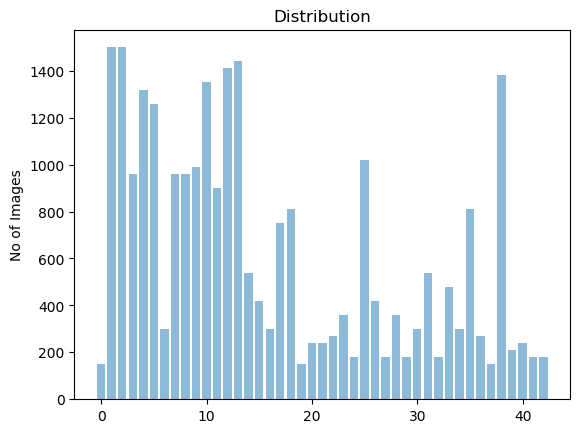

In [33]:
# https://pythonspot.com/matplotlib-bar-chart/

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

y_pos = np.arange(43)
performance = dist

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.ylabel('No of Images')
plt.title('Distribution')

plt.show()

In [34]:
df_ppm = pd.read_csv(r"C:/Users/Abhishek/Desktop/GTSRB-Training_fixed/GTSRB/Training/"+"00000"+"/"+"GT-"+"00000"+".csv",sep=';')

In [35]:
a=df_ppm[["Roi.X1","Roi.Y1","Roi.X2","Roi.Y2"]][df_ppm["Filename"]=="00002_00029.ppm"]
tuple(a.iloc[0])

(11, 11, 112, 114)

(5, 4, 46, 46)


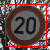

In [37]:
# im = Image.open("00002_00029.ppm")
# im
from PIL import Image, ImageDraw 
df=pd.read_csv('C:/Users/Abhishek/Desktop/Train/'+"00000"+"/"+'00000'+".csv")
a=df[["x1","y1","x2","y2"]][df["Filename"]=="00002_00029.jpg"]
coordinates=tuple(a.iloc[0])
p='C:/Users/Abhishek/Desktop/Train/'+"00000"+"/"+"00002_00029.jpg"
im=Image.open(p)
im=im.resize((50,50))
img1 = ImageDraw.Draw(im)
img1.rectangle(coordinates, outline ="red")
print(coordinates)
im

In [38]:
# https://www.geeksforgeeks.org/python-pil-imagedraw-draw-rectangle/
import math 
from PIL import Image, ImageDraw 
p=["00000","00002","00004","00006","00008","00010","00012","00014","00016","00018"]
image=[]
for i in p:
    df=pd.read_csv('C:/Users/Abhishek/Desktop/Train/'+i+"/"+i+".csv")
#     print(df.head())
    a=df[["x1","y1","x2","y2"]][df["Filename"]=="00002_00029.jpg"]
    coordinates=tuple(a.iloc[0])
    print(coordinates)
    p='C:/Users/Abhishek/Desktop/Train/'+i+"/"+"00002_00029.jpg"
    im=Image.open(p)
    im=im.resize((50,50))
    img1 = ImageDraw.Draw(im)
    img1.rectangle(coordinates, outline ="red")
    image.append(im)

(5, 4, 46, 46)
(5, 4, 46, 46)
(4, 4, 46, 46)
(4, 5, 46, 46)
(4, 5, 45, 46)
(5, 5, 45, 45)
(4, 4, 46, 46)
(5, 4, 46, 46)
(4, 5, 46, 46)
(4, 4, 46, 46)


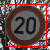

In [54]:
import pylab as plt
plt.imshow(image[0])
image[0]

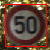

In [57]:
import pylab as plt
plt.imshow(image[1])
image[1]

In [46]:
plt.imshow(image[2])

In [47]:
plt.imshow(image[3])

In [48]:
plt.imshow(image[4])

In [49]:
plt.imshow(image[5])

In [50]:
plt.imshow(image[6])

In [51]:
plt.imshow(image[7])

In [52]:
plt.imshow(image[8])

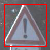

In [58]:
plt.imshow(image[9])
image[9]

In [11]:
q=pd.DataFrame()
a = pd.DataFrame([['Fi'],['Ki']],columns=['User'], index=['A1','A2'],) #'ID')
b = pd.DataFrame([['Fi'],['Ki']],columns=['User'], index=['A4','A5'],) #'ID')pd.concat([a,b])
q=q.append(a)
q=q.append(b)

In [14]:
q

,User
A1,Fi
A2,Ki
A4,Fi
A5,Ki


In [32]:
import pandas as pd
df=pd.DataFrame()
for i in pa:
    df1=pd.read_csv('C:/Users/Abhishek/Desktop/Train/'+i+"/"+i+".csv")
    df=df.append(df1)

In [33]:
df.shape

(26640, 6)

In [34]:
df["class"]=label

In [36]:
df.to_csv("Train.csv")

In [18]:
# import pandas as pd
# df_test=pd.DataFrame()
# for i in pa:
#     df1=pd.read_csv('C:/Users/Abhishek/Desktop/Train/'+i+"/"+i+".csv")
#     df=df.append(df1)

In [125]:
# im = Image.open("00002_00029.ppm")
# im=im.crop((11,11,112,114))
# im

In [28]:
# df_jpg = pd.read_csv(r"C:/Users/Abhishek/Desktop/Train/00000/00000.csv")

In [126]:
# df_jpg[df_jpg["Filename"]=="00002_00029.jpg"]

In [127]:
# im = Image.open("00002_00029.jpg")
# im

In [128]:
# im = Image.open("00002_00029.jpg")
# im=im.resize((50,50))
# im=im.crop((5,4,46,46))
# im

In [28]:
# df_ppm = pd.read_csv(r"C:/Users/Abhishek/Desktop/GTSRB-Training_fixed/GTSRB/Training/"+"00039"+"/"+"GT-"+"00039"+".csv",sep=';')

In [129]:
# df_ppm[df_ppm["Filename"]=="00004_00029.ppm"]

In [130]:
# im =Image.open("00004_00029.ppm")
# im

In [131]:
# im = Image.open("00004_00029.ppm")
# im=im.crop((12,12,133,134))
# im

In [33]:
# df_jpg = pd.read_csv(r"C:/Users/Abhishek/Desktop/Train/00039/00039.csv")

In [132]:
# df_jpg[df_jpg["Filename"]=="00004_00029.jpg"]

In [133]:
# im = Image.open("00004_00029.jpg")
# im

In [134]:
# im = Image.open("00004_00029.jpg")
# im=im.resize((50,50))
# im=im.crop((4,4,46,46))
# im